In [1]:
from __future__ import print_function
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [2]:
# Copy the git repository
!git clone https://github.com/atulgupta01/ERA_Repo.git

fatal: destination path 'ERA_Repo' already exists and is not an empty directory.


In [3]:
#import from git modules

from ERA_Repo.Assignment_10.model import Net
from ERA_Repo.Assignment_10.model import Net
from ERA_Repo.Assignment_10.util import Cifar10Dataset, args, train_transforms, test_transforms, \
get_learning_rate, lr_range_checker, train_val_seq

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install torchsummary

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

In [7]:
trainset = Cifar10Dataset(root='./data', train=True, download=True, transform=train_transforms)
testset = Cifar10Dataset(root='./data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=args().batch_size,
                                          shuffle=True, **args().kwargs)

test_loader = torch.utils.data.DataLoader(testset, batch_size=args().batch_size,
                                          shuffle=True, **args().kwargs)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.37E-02


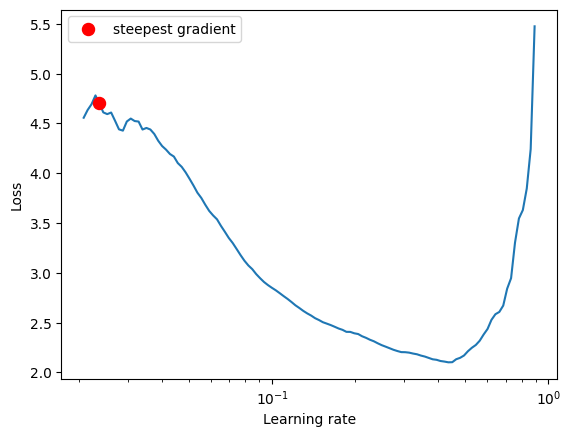

In [8]:
optimizer = optim.Adam(model.parameters(), lr = 0.015, weight_decay = 1e-4)
criterion = torch.nn.CrossEntropyLoss()

lr_range_checker(model, train_loader, optimizer, criterion)

In [9]:
from torch.optim.lr_scheduler import OneCycleLR

EPOCHS = 24
MAX_LR = 2.37E-02

scheduler = OneCycleLR(
        optimizer, max_lr=MAX_LR, steps_per_epoch=len(train_loader),
        anneal_strategy='linear', epochs=EPOCHS, pct_start=5/EPOCHS,
        div_factor=100, three_phase=False, final_div_factor=100)

train_losses, test_losses, train_acc, test_acc, lrs = train_val_seq(model,
                    device,
                    train_loader,
                    test_loader,
                    optimizer,
                    scheduler,
                    criterion,
                    EPOCHS)


EPOCH: 0


Loss=1.2148863077163696 Batch_id=97 Accuracy=43.49 LR=0.0049391963190184044: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.0028, Accuracy: 4942/10000 (49.42%)

EPOCH: 1


Loss=0.7045331597328186 Batch_id=97 Accuracy=62.85 LR=0.009641392638036808: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.0017, Accuracy: 7031/10000 (70.31%)

EPOCH: 2


Loss=0.9155630469322205 Batch_id=97 Accuracy=67.22 LR=0.014343588957055212: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]



Test set: Average loss: 0.0018, Accuracy: 6940/10000 (69.40%)

EPOCH: 3


Loss=0.814867377281189 Batch_id=97 Accuracy=72.71 LR=0.019045785276073618: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.0017, Accuracy: 7014/10000 (70.14%)

EPOCH: 4


Loss=0.7944497466087341 Batch_id=97 Accuracy=74.20 LR=0.023687273023630502: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]



Test set: Average loss: 0.0019, Accuracy: 6764/10000 (67.64%)

EPOCH: 5


Loss=0.7401465177536011 Batch_id=97 Accuracy=76.47 LR=0.02244002933941998: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.0016, Accuracy: 7295/10000 (72.95%)

EPOCH: 6


Loss=0.6233223080635071 Batch_id=97 Accuracy=77.99 LR=0.02119278565520945: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 0.0013, Accuracy: 7895/10000 (78.95%)

EPOCH: 7


Loss=0.6224390864372253 Batch_id=97 Accuracy=79.22 LR=0.019945541970998924: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.0012, Accuracy: 7963/10000 (79.63%)

EPOCH: 8


Loss=0.5192044973373413 Batch_id=97 Accuracy=80.08 LR=0.0186982982867884: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 0.0014, Accuracy: 7598/10000 (75.98%)

EPOCH: 9


Loss=0.508722186088562 Batch_id=97 Accuracy=80.64 LR=0.017451054602577874: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.0012, Accuracy: 7940/10000 (79.40%)

EPOCH: 10


Loss=0.5480846166610718 Batch_id=97 Accuracy=80.91 LR=0.016203810918367346: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 0.0010, Accuracy: 8387/10000 (83.87%)

EPOCH: 11


Loss=0.4482499957084656 Batch_id=97 Accuracy=81.27 LR=0.01495656723415682: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 0.0011, Accuracy: 8212/10000 (82.12%)

EPOCH: 12


Loss=0.5290623307228088 Batch_id=97 Accuracy=82.10 LR=0.013709323549946294: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 0.0010, Accuracy: 8288/10000 (82.88%)

EPOCH: 13


Loss=0.4943523406982422 Batch_id=97 Accuracy=82.49 LR=0.012462079865735769: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]



Test set: Average loss: 0.0011, Accuracy: 8109/10000 (81.09%)

EPOCH: 14


Loss=0.607977032661438 Batch_id=97 Accuracy=83.34 LR=0.011214836181525242: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 0.0009, Accuracy: 8493/10000 (84.93%)

EPOCH: 15


Loss=0.4821152091026306 Batch_id=97 Accuracy=83.59 LR=0.009967592497314716: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]



Test set: Average loss: 0.0009, Accuracy: 8564/10000 (85.64%)

EPOCH: 16


Loss=0.36707818508148193 Batch_id=97 Accuracy=84.20 LR=0.00872034881310419: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]



Test set: Average loss: 0.0008, Accuracy: 8571/10000 (85.71%)

EPOCH: 17


Loss=0.44837164878845215 Batch_id=97 Accuracy=85.46 LR=0.007473105128893664: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 0.0008, Accuracy: 8596/10000 (85.96%)

EPOCH: 18


Loss=0.3737371861934662 Batch_id=97 Accuracy=85.72 LR=0.006225861444683137: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]



Test set: Average loss: 0.0009, Accuracy: 8555/10000 (85.55%)

EPOCH: 19


Loss=0.37671273946762085 Batch_id=97 Accuracy=86.67 LR=0.00497861776047261: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]



Test set: Average loss: 0.0007, Accuracy: 8807/10000 (88.07%)

EPOCH: 20


Loss=0.3137880861759186 Batch_id=97 Accuracy=87.68 LR=0.003731374076262086: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 0.0007, Accuracy: 8856/10000 (88.56%)

EPOCH: 21


Loss=0.2817465662956238 Batch_id=97 Accuracy=89.08 LR=0.002484130392051559: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.0006, Accuracy: 8960/10000 (89.60%)

EPOCH: 22


Loss=0.294219434261322 Batch_id=97 Accuracy=90.50 LR=0.0012368867078410319: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 0.0006, Accuracy: 8979/10000 (89.79%)

EPOCH: 23


Loss=0.2660576403141022 Batch_id=97 Accuracy=91.71 LR=-1.035697636949176e-05: 100%|██████████| 98/98 [00:28<00:00,  3.47it/s]



Test set: Average loss: 0.0006, Accuracy: 9096/10000 (90.96%)



Text(0.5, 1.0, 'Test Accuracy')

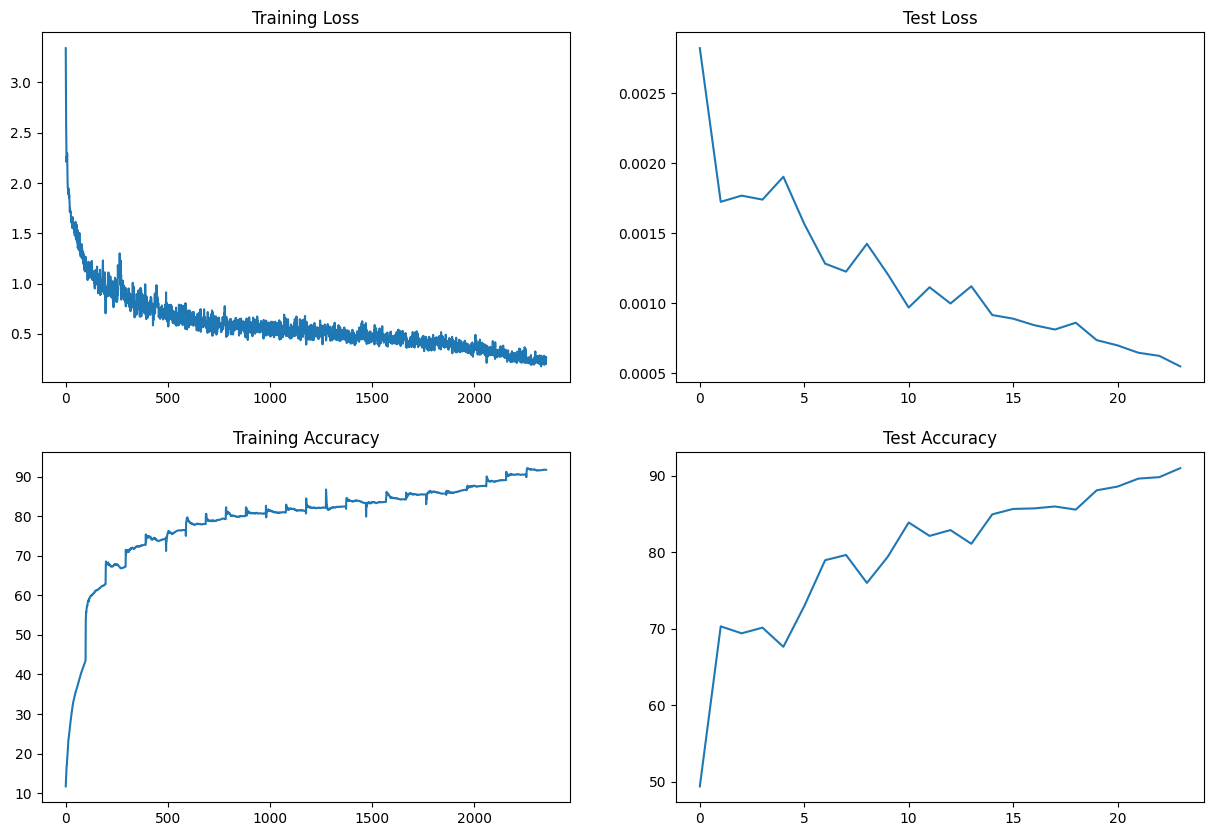

In [12]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(torch.tensor(train_losses).cpu().detach().numpy())
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

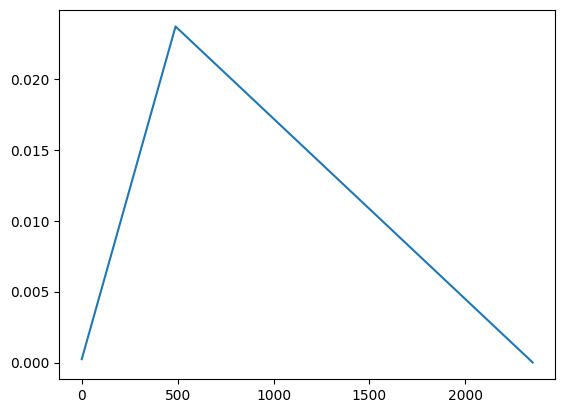

In [13]:
plt.plot(lrs)